## Group 3

# Diego Estuar, Yannick Angouo Lopes, Andrew Xu

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load house price dataset (training set) from github
df = pd.read_csv("https://github.com/ArinB/MSBA-CA-Data/raw/main/CA01/house-price-train.csv")

# Part I: Data Understanding

In [3]:
#print the first few rows
print(df.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [4]:
## print the DataFrame's shape
print(df.shape)

(1460, 81)


In [5]:
## print the DataFrame's data types
pd.set_option('display.max_rows', None)
#pd.reset_option('max_rows')
print(df.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [6]:
## check for missing values
print(df.isnull().sum())


Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

# Andrew

In [7]:
# Finding missing values
missing_values = df.isnull().sum()
# Get columns with missing values
columns_with_missing_values = missing_values[missing_values > 0].index
print(columns_with_missing_values)
# Print missing features and it's number of missing values
df[columns_with_missing_values].isnull().sum()

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')


LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

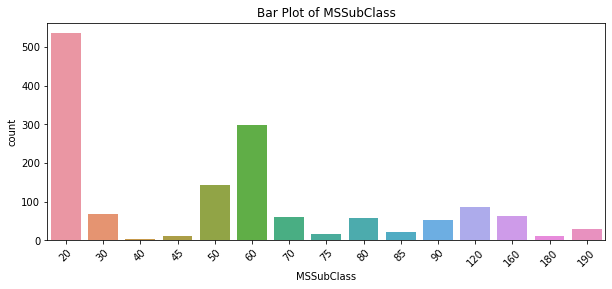

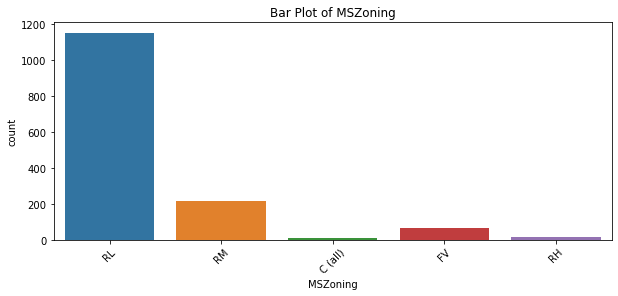

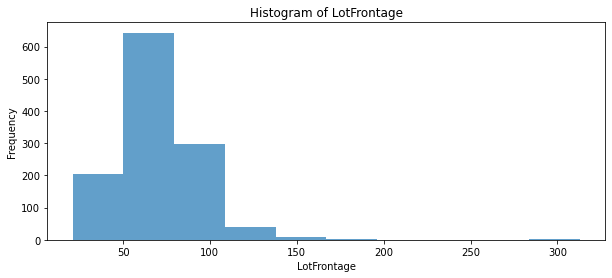

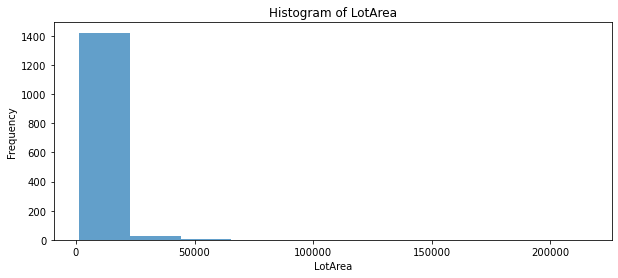

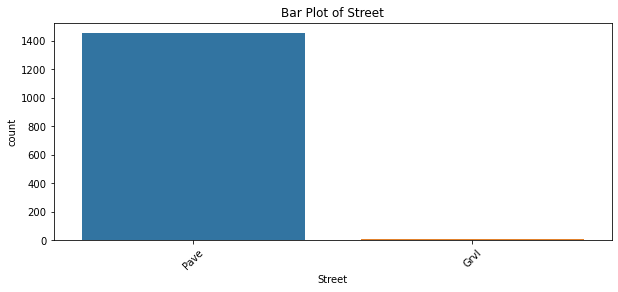

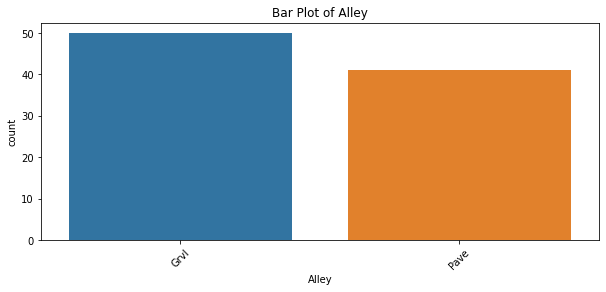

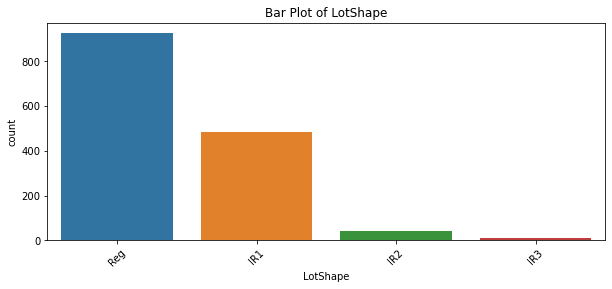

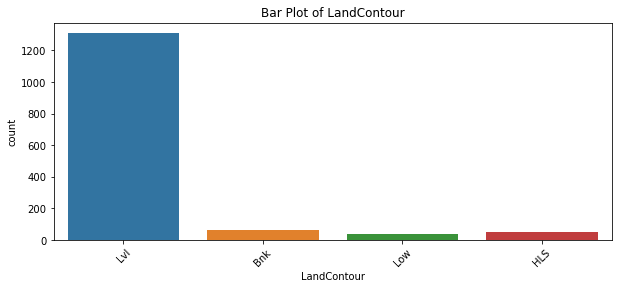

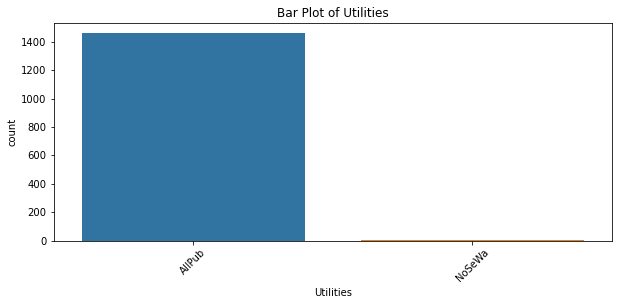

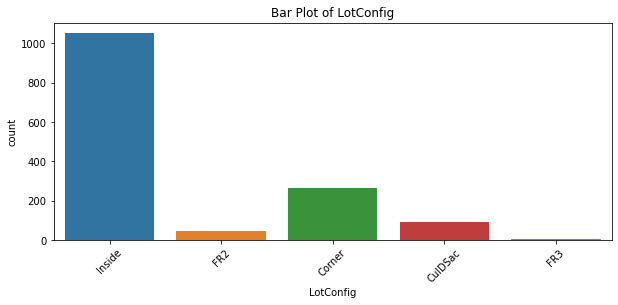

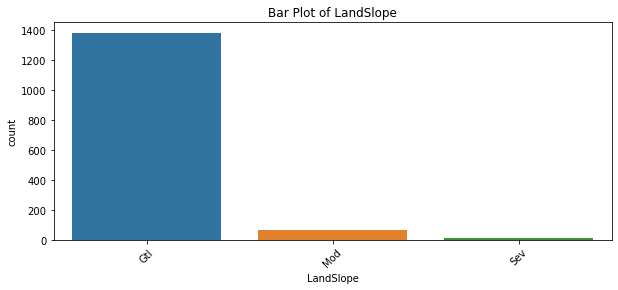

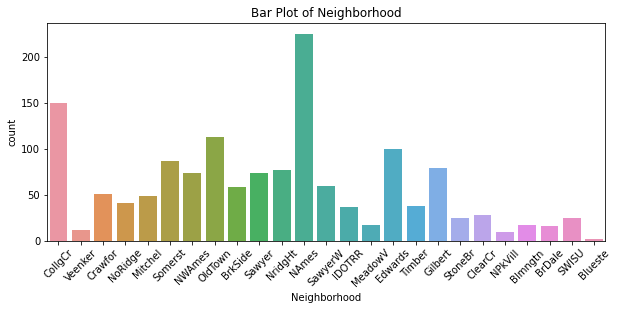

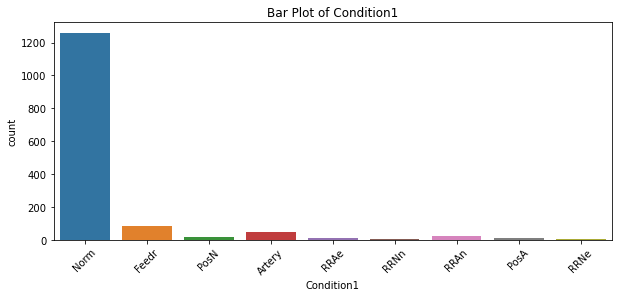

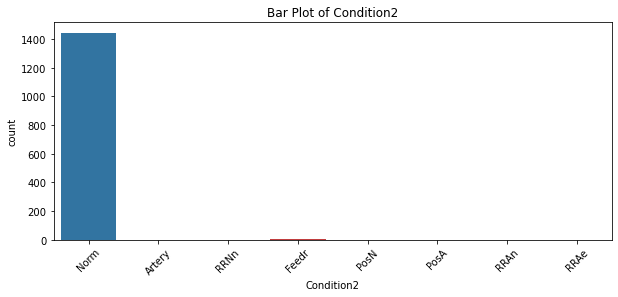

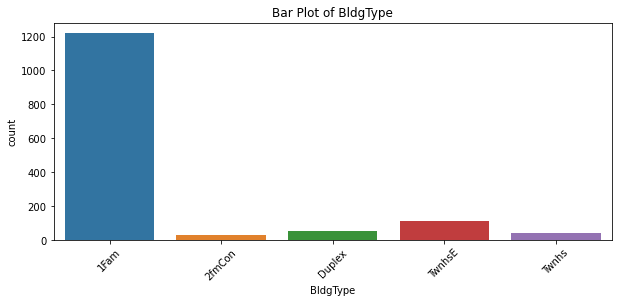

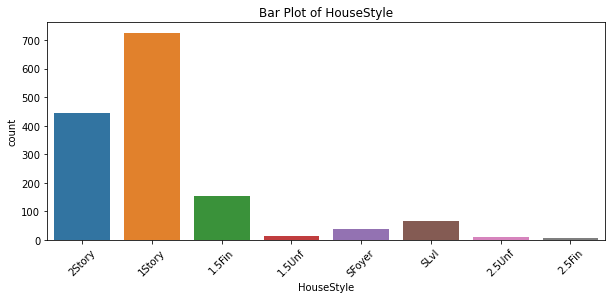

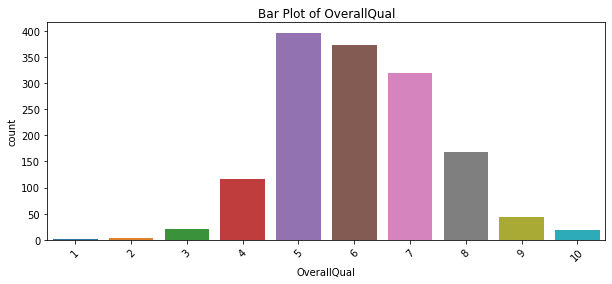

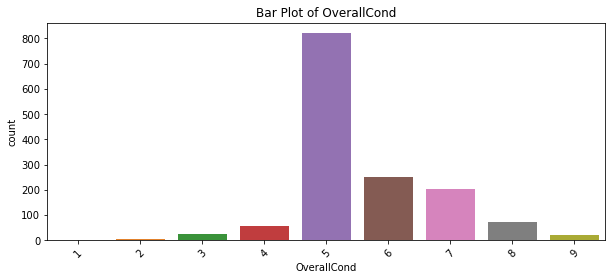

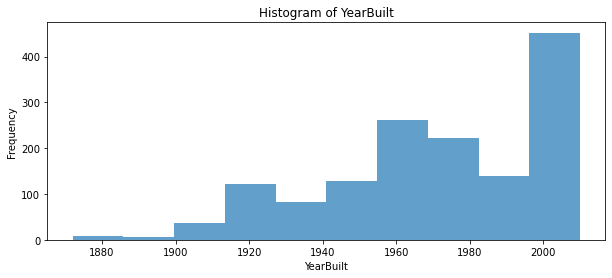

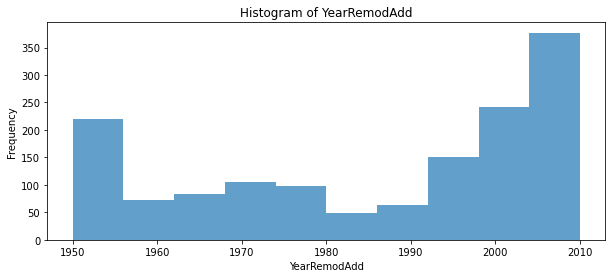

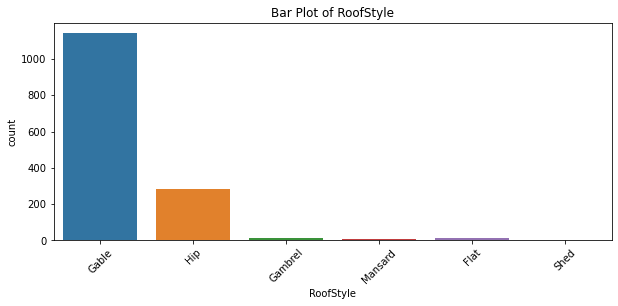

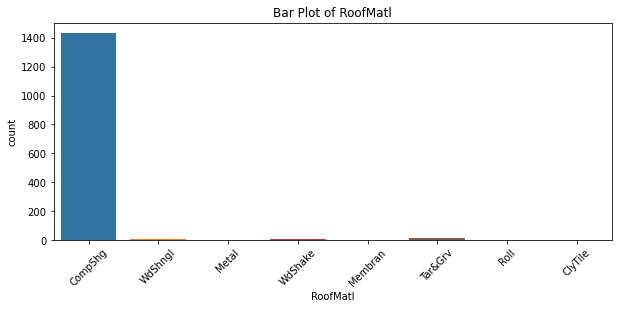

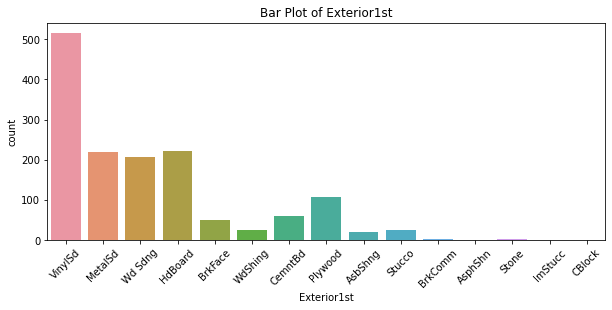

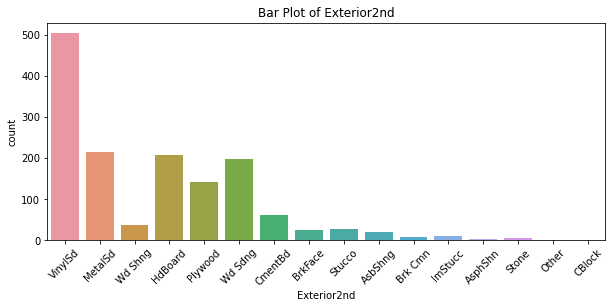

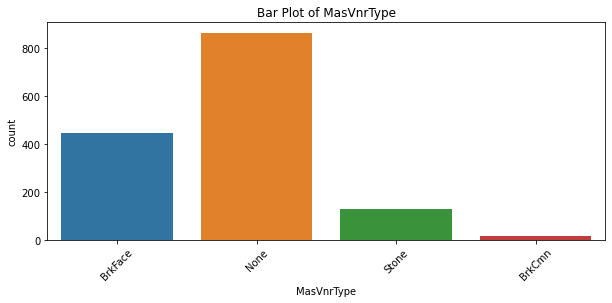

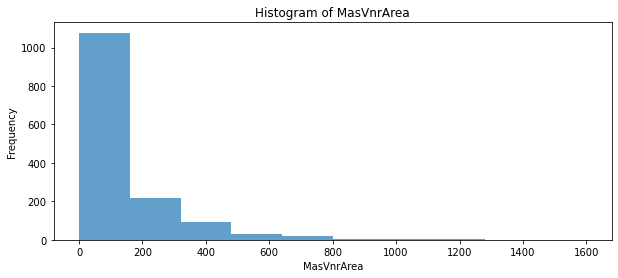

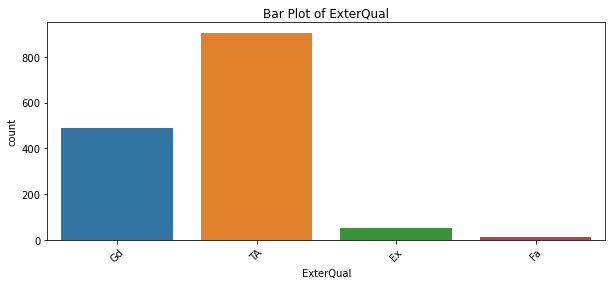

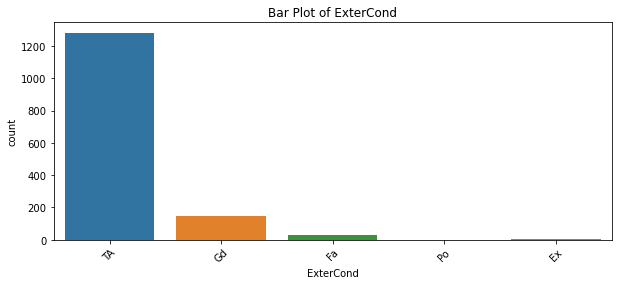

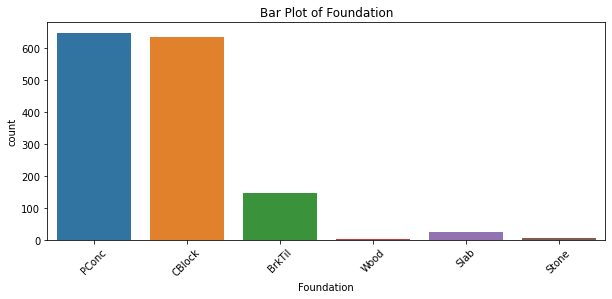

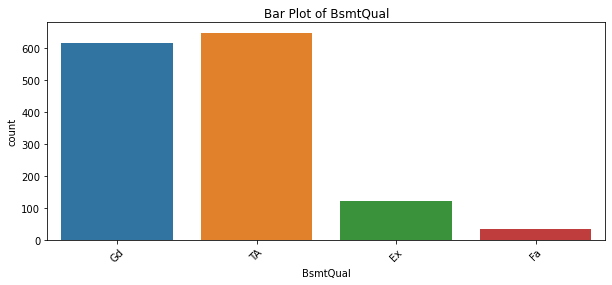

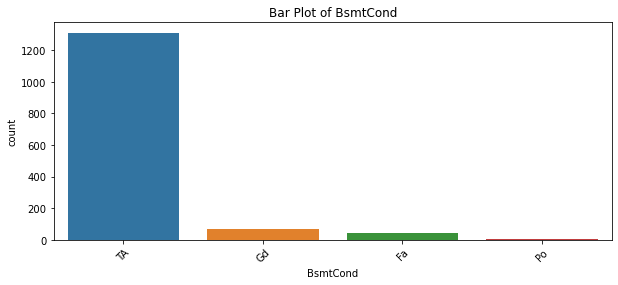

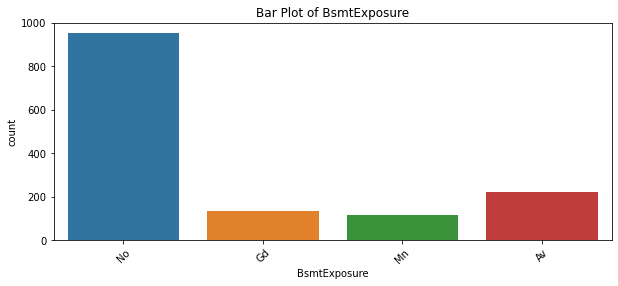

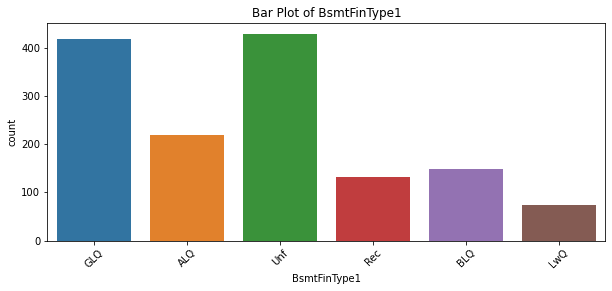

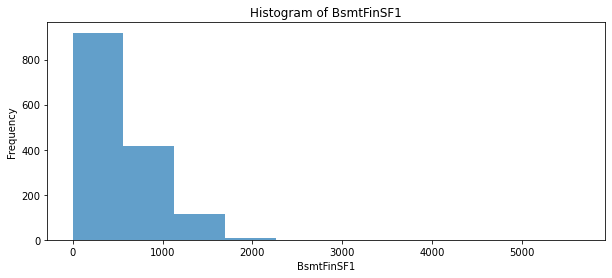

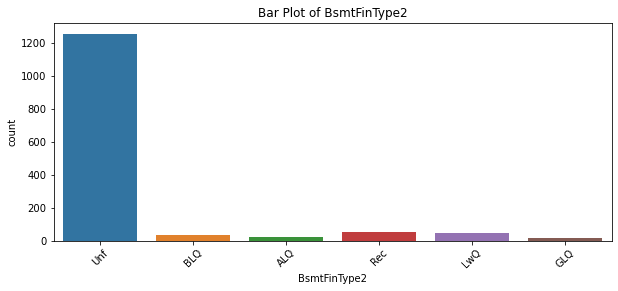

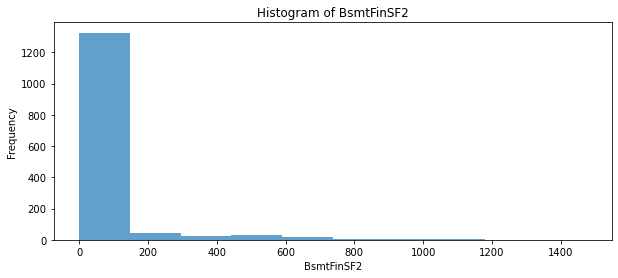

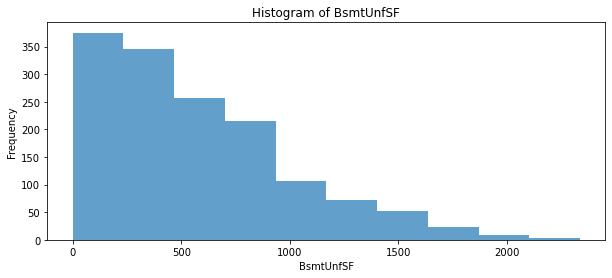

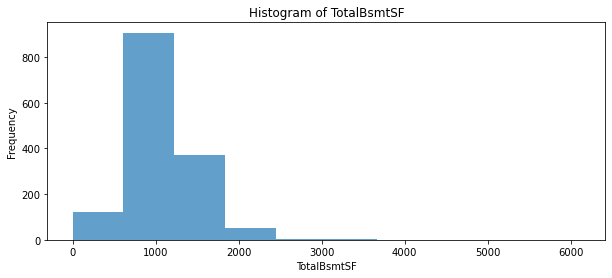

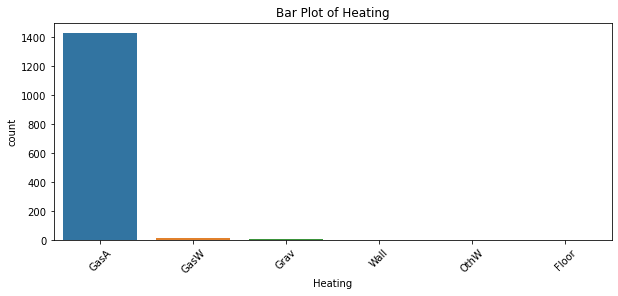

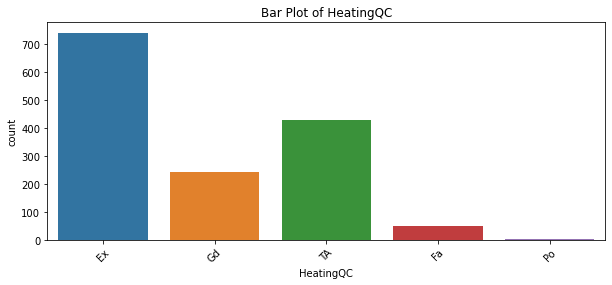

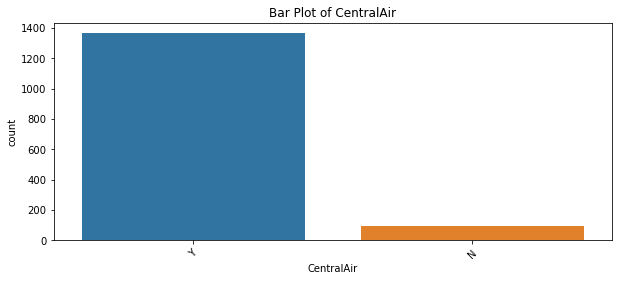

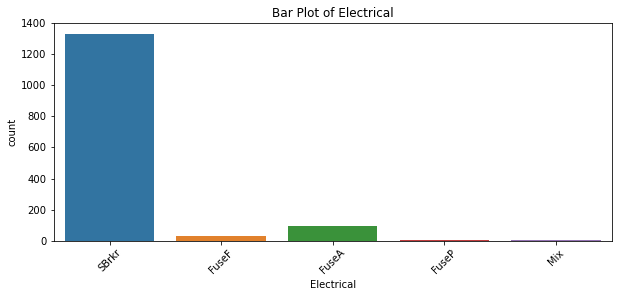

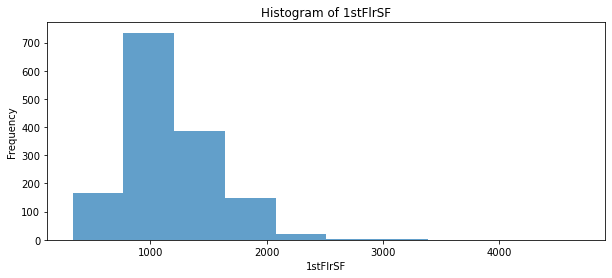

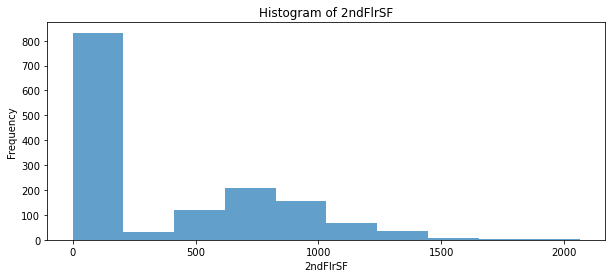

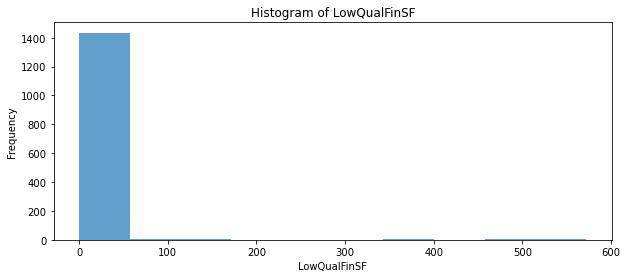

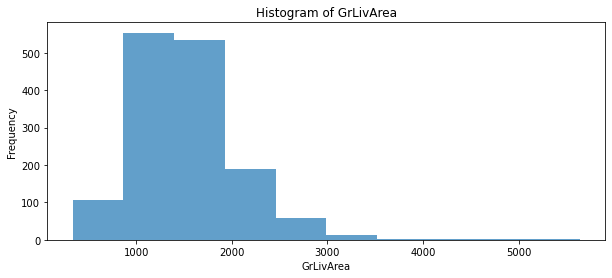

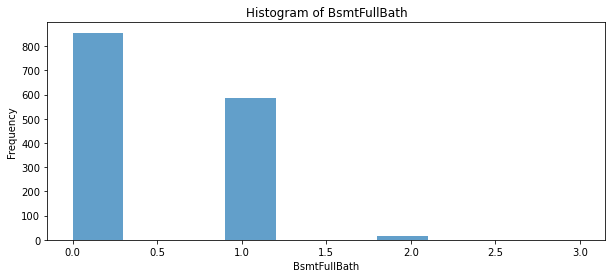

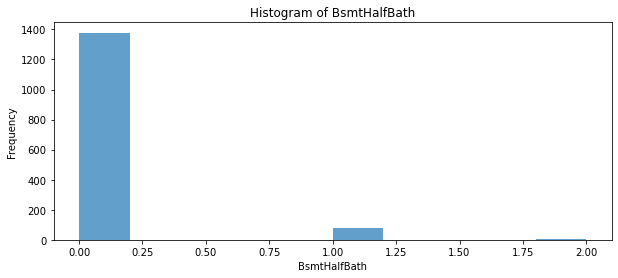

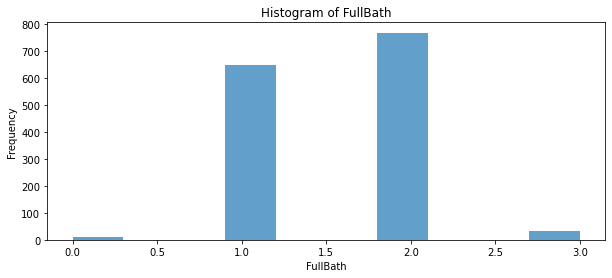

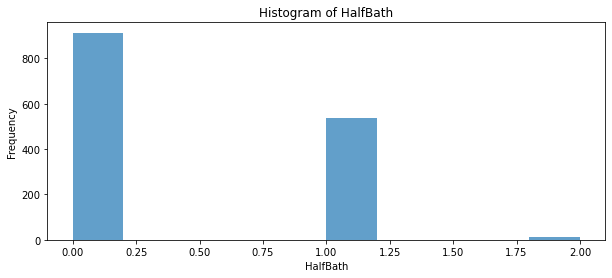

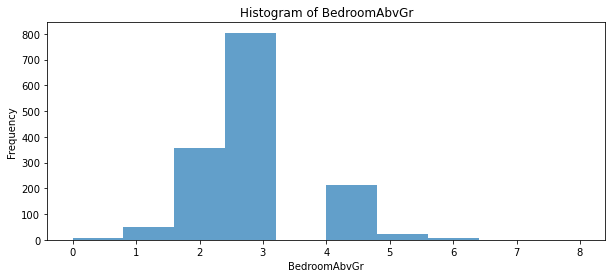

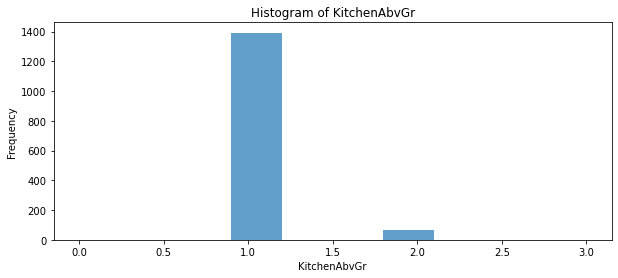

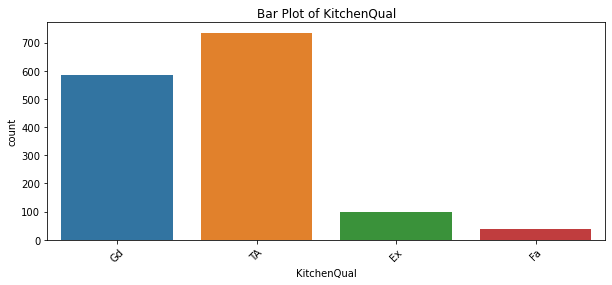

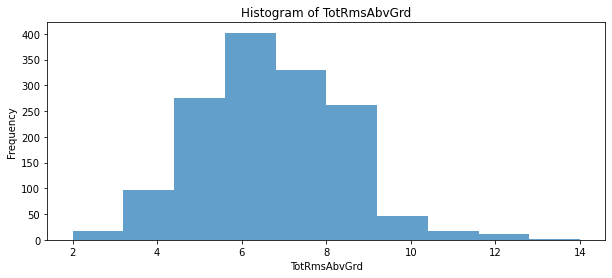

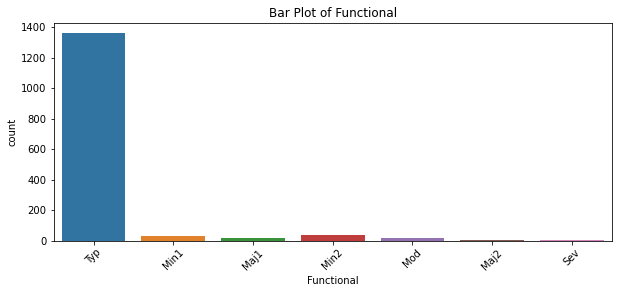

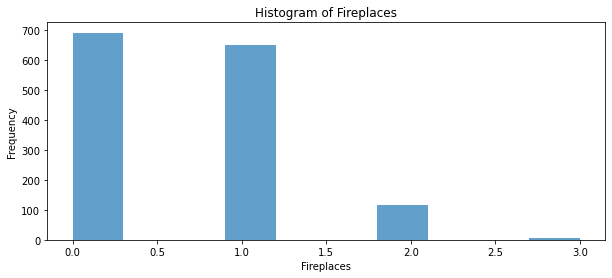

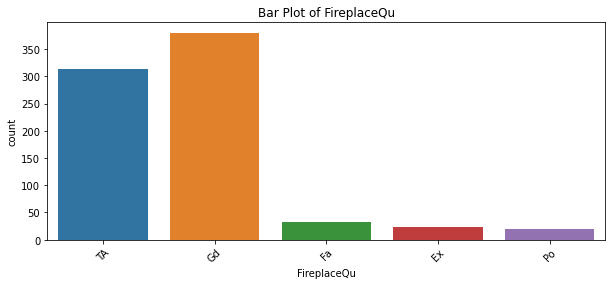

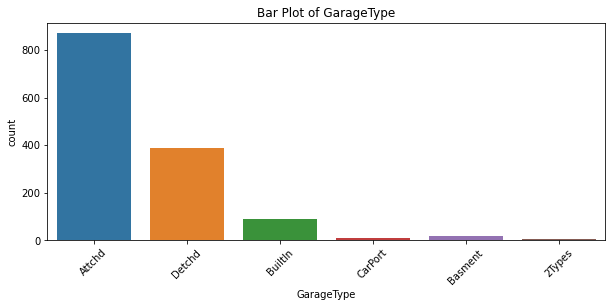

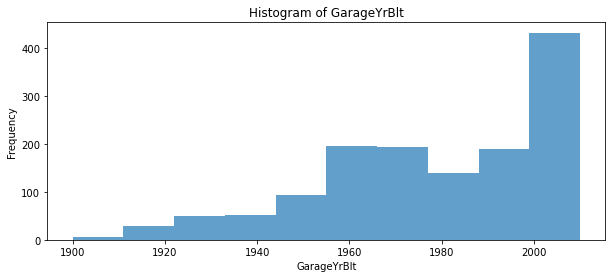

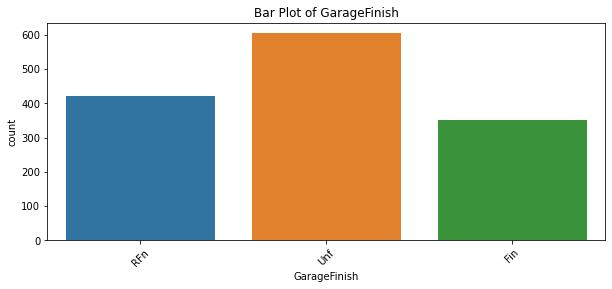

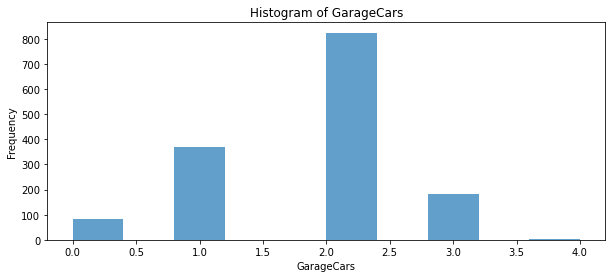

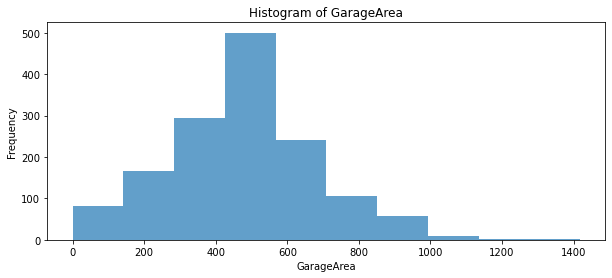

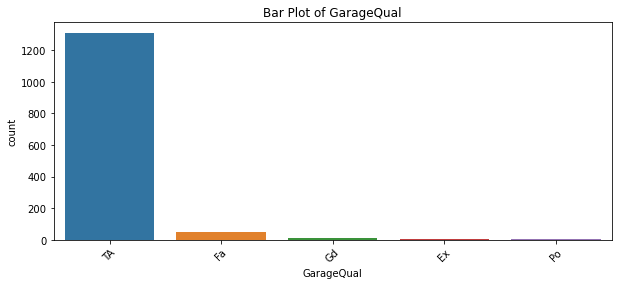

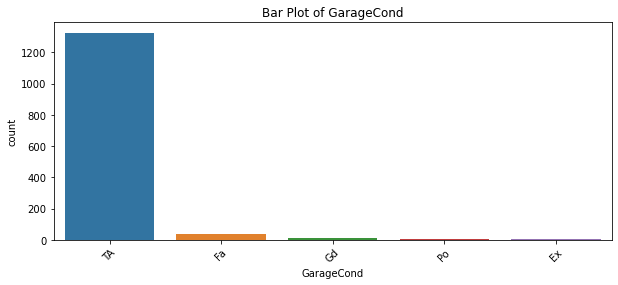

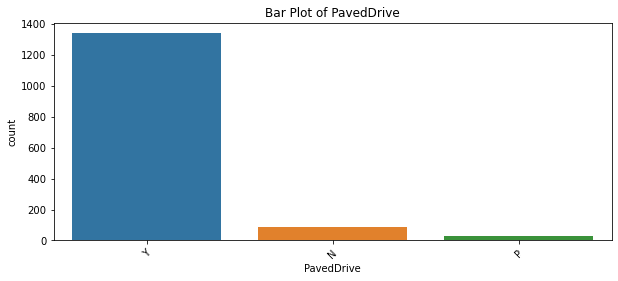

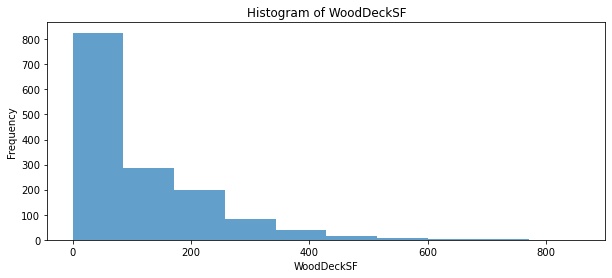

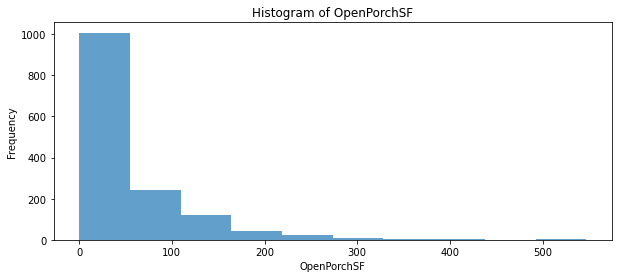

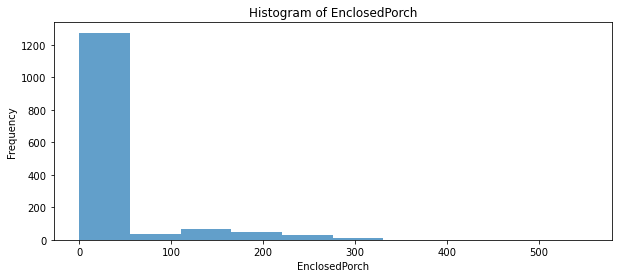

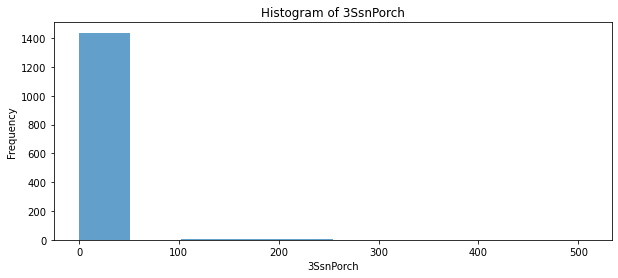

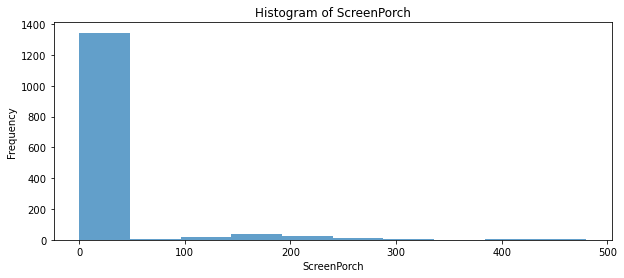

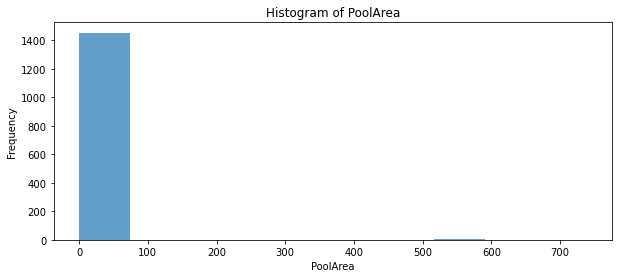

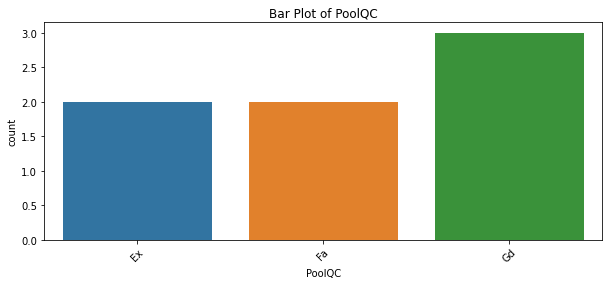

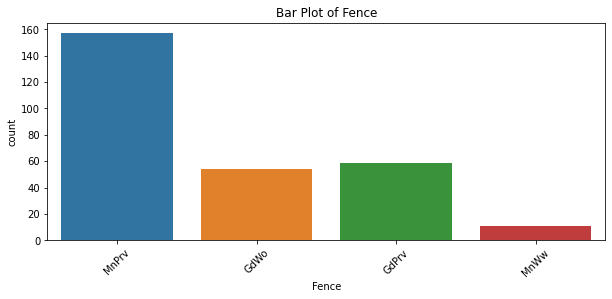

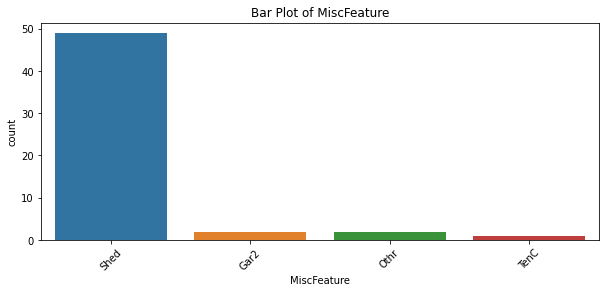

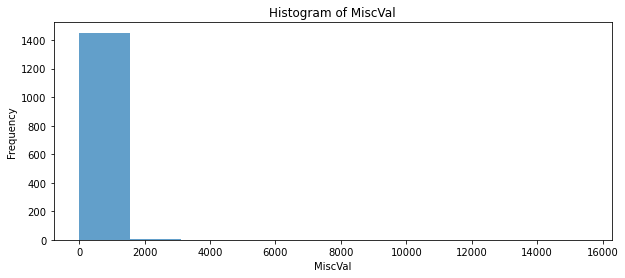

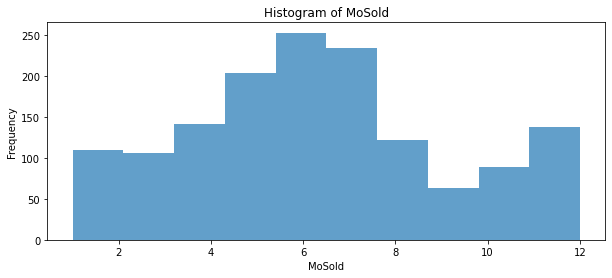

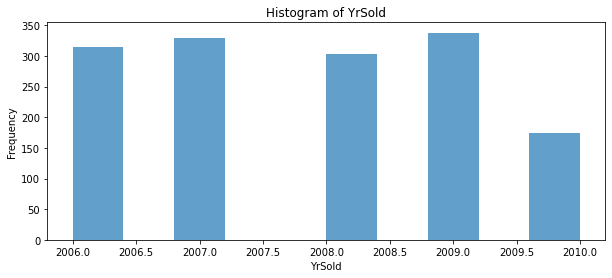

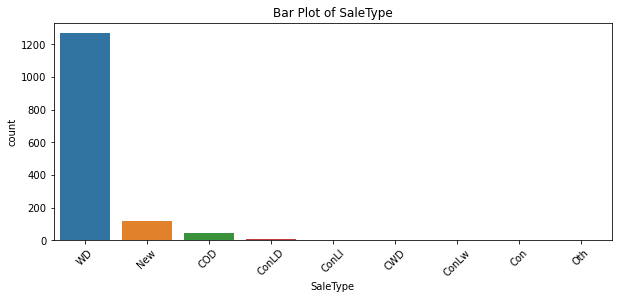

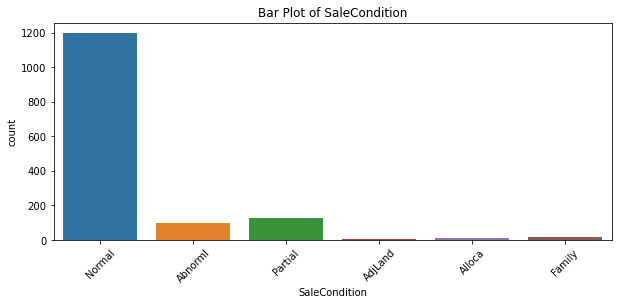

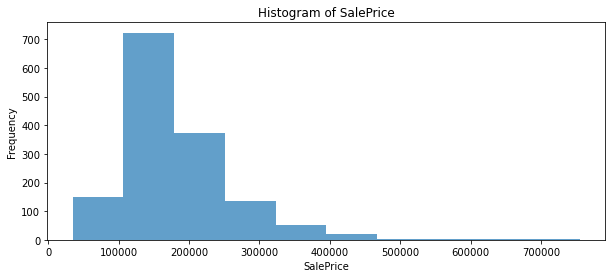

In [8]:
#Create visulizations for df, if it's a number, create a histogram, if it's an object/categoricable variable, create a bar plot with counts of each categories.
# Determine the type of each column
# List of specific columns to treat as categorical which are numbers in the dataset
categorical_cols = ['MSSubClass', 'OverallQual', 'OverallCond']

for column in df.columns:
    if column != 'Id':
        if df[column].dtype == 'object' or column in categorical_cols:
            # It's a categorical column, create a bar plot
            plt.figure(figsize=(10, 4))
            sns.countplot(x=column, data=df)
            plt.title(f'Bar Plot of {column}')
            plt.xticks(rotation=45)
            plt.show()
        else:
            # It's a numeric column, create a histogram
            plt.figure(figsize=(10, 4))
            plt.hist(df[column], bins=10, alpha=0.7)
            plt.title(f'Histogram of {column}')
            plt.xlabel(column)
            plt.ylabel('Frequency')
            plt.show()

In [9]:
# From the barplot of house type we can see that the most common house type is one-story.

In [10]:
## calculate basic statistics for a numeric column
pd.set_option('display.max_rows', None)
for column in df.columns:
    if column != 'Id':
        if df[column].dtype != 'object' and column not in categorical_cols:
            print(df[column].describe())

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64
count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64
count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64
count    1460.000000
mean     1984.865753
std        20.645407
min      1950.000000
25%      1967.000000
50%      1994.000000
75%      2004.000000
max      2010.000000
Name: YearRemodAdd, dtype: float64
count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrA

In [11]:
## calculate the correlation between two numeric columns
#fireplaces and sales price
print(df['Fireplaces'].corr(df['SalePrice']))

0.46692883675152763


In [12]:
#sales price group by pool quality 
grouped_df_1 = df.groupby('PoolQC')['SalePrice'].mean()
print(grouped_df_1)
#sales price group by fence quality 
grouped_df_2 = df.groupby('Fence')['SalePrice'].mean()
print(grouped_df_2)
#From here we learn that there are no TA(average)/NA(No) pool type houses in the dataset

PoolQC
Ex    490000
Fa    215500
Gd    201990
Name: SalePrice, dtype: int64
Fence
GdPrv    178927.457627
GdWo     140379.314815
MnPrv    148751.089172
MnWw     134286.363636
Name: SalePrice, dtype: float64


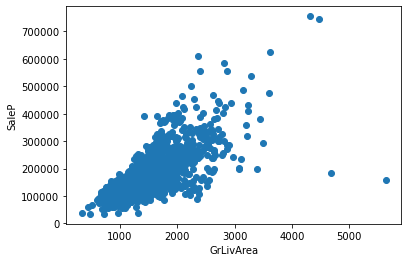

In [13]:
## create a scatter plot to visualize the relationship between two numeric columns
plt.scatter(df['GrLivArea'], df['SalePrice'])
plt.xlabel('GrLivArea')
plt.ylabel('SaleP')
plt.show()

In [14]:
#The insight gained from this analysis is that, in this dataset, 
#the Above grade (ground) living area square feet, as measured by 'GrLivArea', is a significant factor influencing the sale price. 
#Buyers are willing to pay more for houses with more above grade (ground) living area square feet.

## Yannick

In [15]:
#we are interested in understanding how the overall quality of a house ('OverallQual') 
#is related to its sale price ('SalePrice'). 
#We want to determine whether houses with higher overall quality tend to have higher sale prices.
#Here's the thought process and steps to analyze this:

In [16]:
## Method 1: group the data by a categorical column and calculate statistics
grouped_df = df.groupby('OverallQual')['SalePrice'].mean()
print(grouped_df)

OverallQual
1      50150.000000
2      51770.333333
3      87473.750000
4     108420.655172
5     133523.347607
6     161603.034759
7     207716.423197
8     274735.535714
9     367513.023256
10    438588.388889
Name: SalePrice, dtype: float64


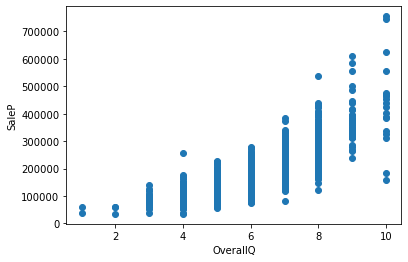

In [17]:
## create a scatter plot to visualize the relationship between two numeric columns
plt.scatter(df['OverallQual'], df['SalePrice'])
plt.xlabel('OverallQ')
plt.ylabel('SaleP')
plt.show()

In [18]:
#The insight gained from this analysis is that, in this dataset, 
#the quality of a house, as measured by 'OverallQual', is a significant factor influencing the sale price. 
#Buyers are willing to pay more for houses with better overall quality.

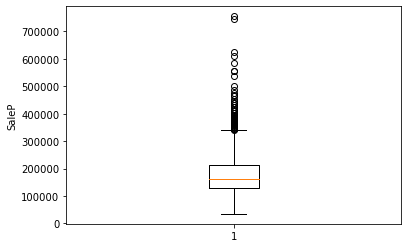

In [19]:
## create a box plot to visualize the distribution of a numeric column
plt.boxplot(df['SalePrice'])
plt.ylabel('SaleP')
plt.show() 
#The outliers hint

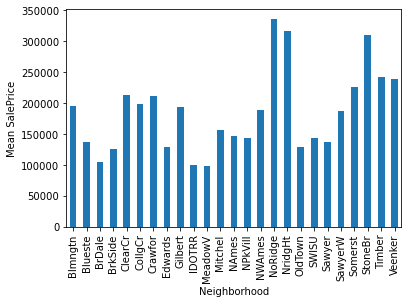

In [20]:
# create a bar plot to visualize the mean of a numeric column for each category of a categorical column
#SalePrice by Neighborhood
df_grouped = df.groupby('Neighborhood')
df_grouped = df_grouped['SalePrice'].mean()
df_grouped.plot(kind='bar')
plt.ylabel('Mean SalePrice')
plt.show()

In [21]:
## create a pivot table to summarize the data
## Question: "What is the mean sale price of houses across different neighborhoods categorized by their overall quality?"
pivot_table = df.pivot_table(index='Neighborhood', columns='OverallQual', values='SalePrice', aggfunc='mean')
print(pivot_table)

OverallQual        1        2             3              4              5   \
Neighborhood                                                                 
Blmngtn           NaN      NaN           NaN            NaN            NaN   
Blueste           NaN      NaN           NaN            NaN            NaN   
BrDale            NaN      NaN           NaN            NaN  117000.000000   
BrkSide       39300.0  60000.0  67000.000000  100850.000000  124661.904762   
ClearCr           NaN      NaN           NaN  183977.333333  173083.333333   
CollgCr           NaN      NaN           NaN  123600.000000  134858.928571   
Crawfor           NaN      NaN           NaN  137500.000000  143853.363636   
Edwards       61000.0      NaN  85220.000000  111146.000000  123568.421053   
Gilbert           NaN      NaN           NaN  141000.000000  168713.333333   
IDOTRR            NaN  35311.0  85666.666667   84081.333333  105363.000000   
MeadowV           NaN      NaN           NaN   84150.000000  113

In [22]:
# it differentiates the price impact of both the property's intrinsic quality and its location.

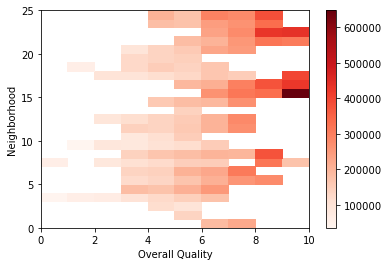

In [23]:
## create a heatmap to visualize the pivot table
plt.pcolor(pivot_table, cmap='Reds')
plt.colorbar()
plt.xlabel('Overall Quality')
plt.ylabel('Neighborhood')
plt.show()

# Diego

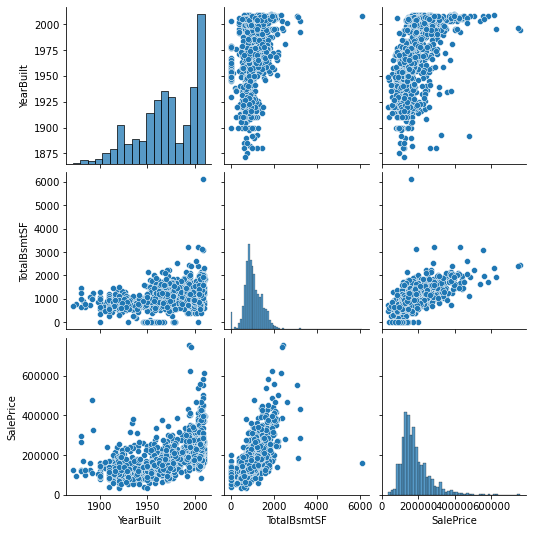

In [24]:
# create a pairplot to visualize the relationships between multiple numeric columns
sns.pairplot(df, vars=['YearBuilt', 'TotalBsmtSF', 'SalePrice']) 
plt.show()

In [25]:
#Sale prices has a stronger positive relationship with total basement square feet than with year built, 
# and the size of basement square feet didn't increase much over years.

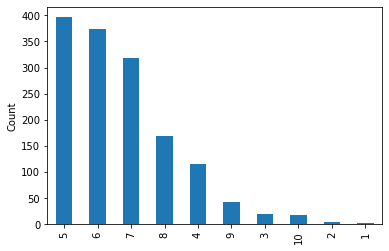

In [26]:
## create a bar plot to visualize the count of a categorical column
df['OverallQual'].value_counts().plot(kind='bar')
plt.ylabel('Count')
plt.show()

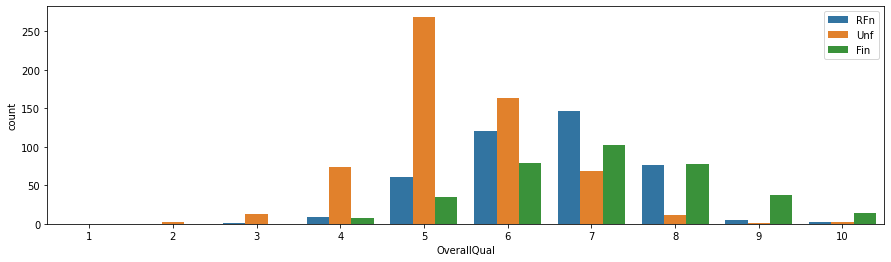

In [27]:
## create a countplot to visualize the count of a categorical column by the categories of another categorical column
plt.figure(figsize=(15, 4))
sns.countplot(x='OverallQual', hue='GarageFinish', data=df)
plt.legend(loc='upper right') 
plt.show()

In [28]:
#Here we can see most houses that have a quality score lower than 6 has unfinished garages.

### Yannick

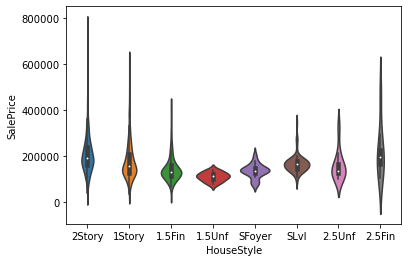

In [29]:
# create a violin plot to visualize the distribution of a numeric column by the categories of a categorical column
sns.violinplot(x='HouseStyle', y='SalePrice', data=df)
plt.ylabel('SalePrice')
plt.show()

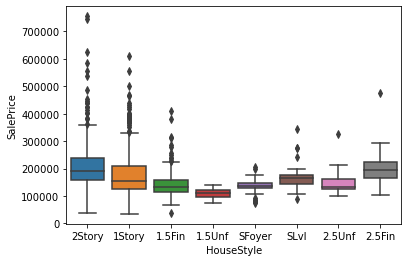

In [30]:
## create a box plot to visualize the distribution of a numeric column by the categories of a categorical column
sns.boxplot(x='HouseStyle', y='SalePrice', data=df)
plt.ylabel('SalePrice')
plt.show() 
#we can see a lot of outliers 

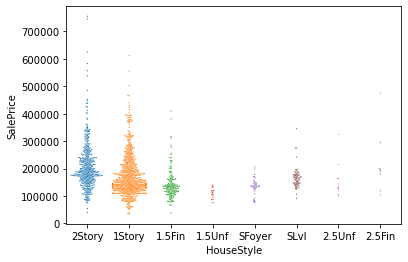

In [31]:
## create a swarm plot to visualize the distribution of a numeric column by the categories of a categorical column
# Fine tune the size of the markers so we won't lose any datapoints.
sns.swarmplot(x='HouseStyle', y='SalePrice', data=df, size = 1.2)
plt.ylabel('SalePrice')
plt.show() 

<Figure size 1440x1440 with 0 Axes>

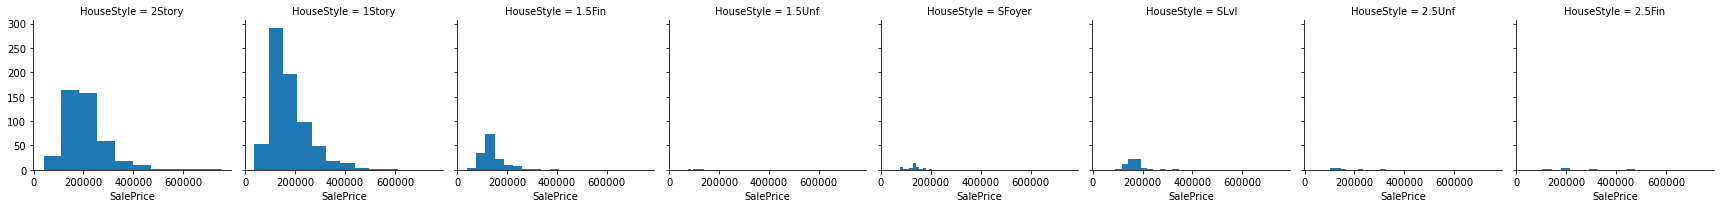

In [32]:
plt.figure(figsize=(20, 20))
g = sns.FacetGrid(df, col='HouseStyle')
g.map(plt.hist, 'SalePrice')  
plt.show()

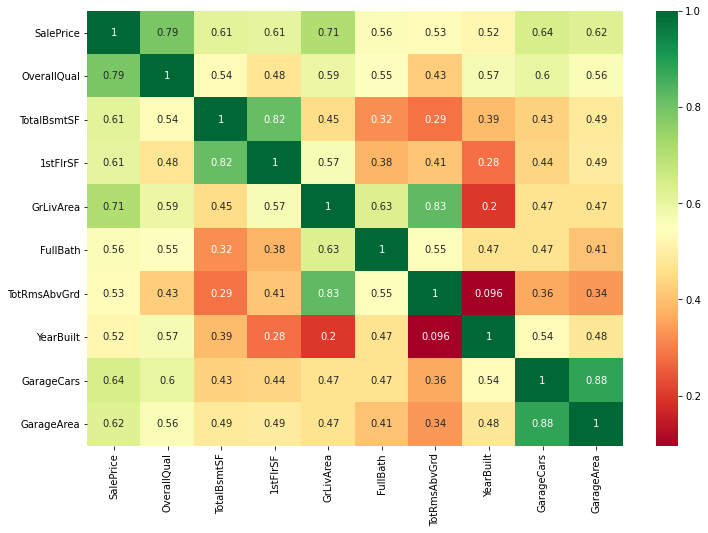

In [33]:
#create a heatmap to visualize the correlation between multiple columns
plt.figure(figsize=(12, 8))
sns.heatmap(df[['SalePrice', 'OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'GarageCars', 'GarageArea']].corr(), cmap='RdYlGn', annot=True)
plt.show() 

#This heatmap will give you a visual representation of how these variables correlate with each other, 
#especially with 'SalePrice',which could provide valuable insights into which factors are most strongly associated 
#with the price at which a house sells.

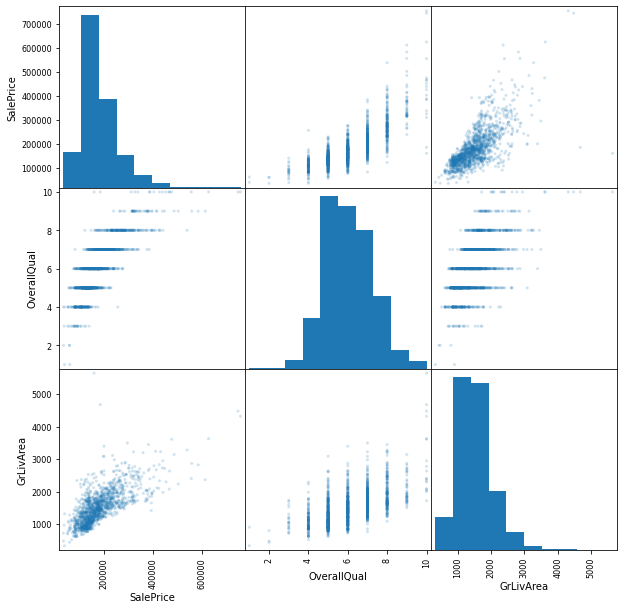

In [34]:
#create a scatter plot matrix to visualize the relationships between multiple numeric columns
from pandas.plotting import scatter_matrix
scatter_matrix(df[['SalePrice', 'OverallQual', 'GrLivArea']], alpha=0.2, figsize=(10, 10))
plt.show() 
#This will create a matrix of scatter plots that can help you visualize the relationships between the sale price 
#of a property, its overall quality, and its living area.

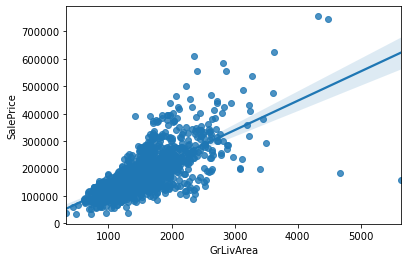

In [35]:
#create a regression plot to visualize the relationship between two numeric columns
#sns.regplot(x='age', y='fare', data=df)
#plt.show() 

sns.regplot(x='GrLivArea', y='SalePrice', data=df)
plt.show() 
#This plot will help in understanding if larger houses (in terms of living area) 
#tend to sell for higher prices, and the strength and tightness of the scatter 
#around the regression line will also give insight into the variability of sale prices relative to living area size.

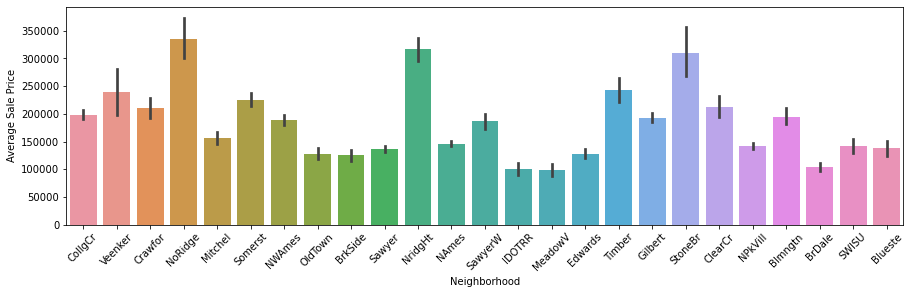

In [36]:
## create a barplot to visualize the mean of a numeric column by the categories of a categorical column
plt.figure(figsize=(15,4))
sns.barplot(x='Neighborhood', y='SalePrice', data=df)
plt.ylabel('Average Sale Price')
plt.xticks(rotation=45)
plt.show()

#choose 'Neighborhood' as the categorical variable to see how the average sale price varies by neighborhood, 
#which could reveal location-based value differences.

## Andrew

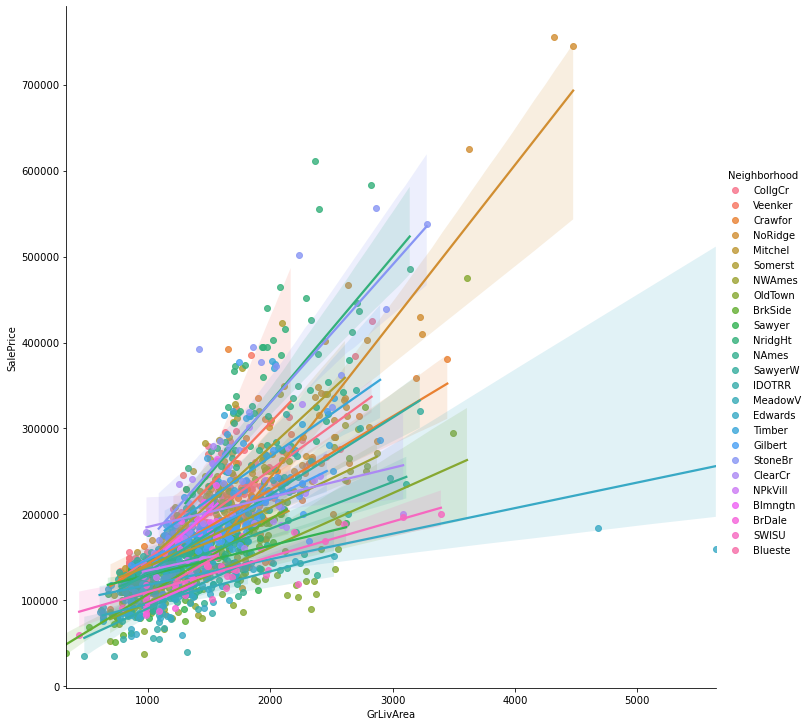

In [37]:
## create a lmplot to visualize the relationship between two numeric columns and the categories of a categorical column
sns.lmplot(x='GrLivArea', y='SalePrice', hue='Neighborhood', data=df, height=10, aspect=1)
plt.show()

In [38]:
#With neighborhood as category, we can see more trends between above grade (ground) living area square feet and sales price in details. 
# Some neighborhoods have a stronger positive relationships compared to others.

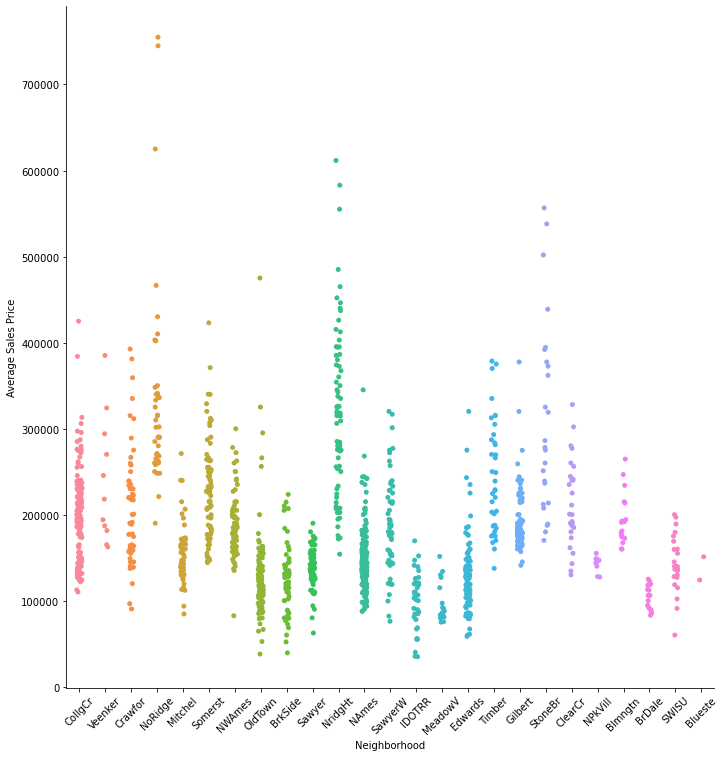

In [39]:
## create a categoryplot to visualize the distribution of a numeric column by the categories of a categorical column
sns.catplot(x='Neighborhood', y='SalePrice', data=df, height=10, aspect=1)
plt.xticks(rotation = 45)
plt.ylabel('Average Sales Price')
plt.show()

In [40]:
#NorthRidge has the most expensive house.

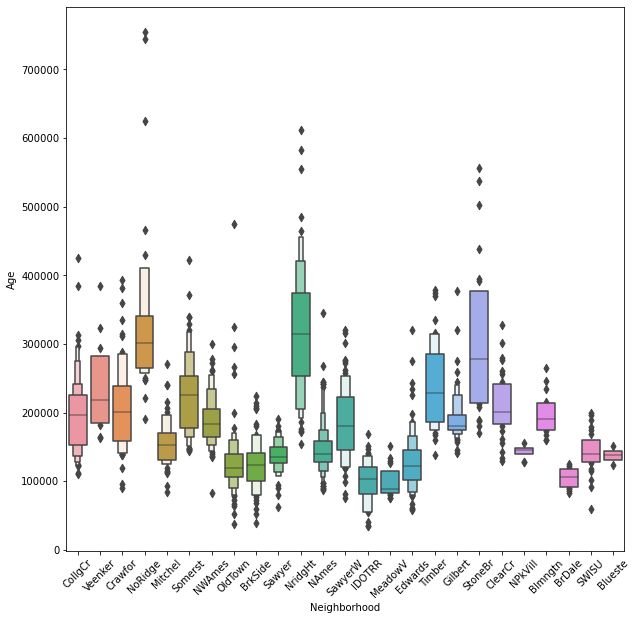

In [41]:
## create a boxenplot to visualize the distribution of a numeric column by the categories of a categorical column
plt.figure(figsize = (10, 10))
sns.boxenplot(x='Neighborhood', y='SalePrice', data=df)
plt.ylabel('Age')
plt.xticks(rotation = 45)
plt.show()

/Users/axu/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


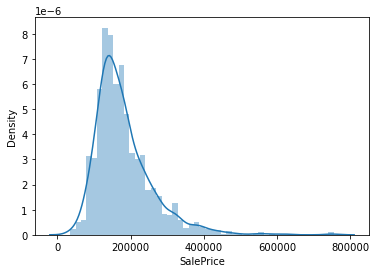

In [42]:
## create a distplot to visualize the distribution of a numeric column
sns.distplot(df['SalePrice'])
plt.show()

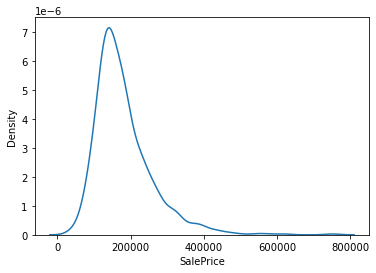

In [43]:
## create a kdeplot to visualize the kernel density estimate of a numeric column
sns.kdeplot(df['SalePrice'])
plt.show()

## Data Quality Report
These following features has missing values:

'LotFrontage': median impute

'Alley': delete

'MasVnrType': Hard to impute becasue it's a categorical variable, perhaps we can impute the value according to MasVrnArea, or just delete the rows with the missing values

'MasVnrArea': median impute

'BsmtQual': Hard to impute because it's a categorical variable, since the missing amount is small, maybe we can delete the rows that contains the missing values.

'BsmtCond': Hard to impute because it's a categorical variable, since the missing amount is small, maybe we can delete the rows that contains the missing values.

'BsmtExposure': Hard to impute because it's a categorical variable, since the missing amount is small, maybe we can delete the rows that contains the missing values.

'BsmtFinType1': Hard to impute because it's a categorical variable, since the missing amount is small, maybe we can delete the rows that contains the missing values.

'BsmtFinType2': Hard to impute because it's a categorical variable, since the missing amount is small, maybe we can delete the rows that contains the missing values.

'Electrical': Hard to impute because it's a categorical variable, since the missing amount is small, maybe we can delete the rows that contains the missing values.

'FireplaceQu': Hard to impute because it's a categorical variable, we can delete the column.

'GarageType': Hard to impute because it's a categorical variable, since the missing amount is small, maybe we can delete the rows that contains the missing values.

'GarageYrBlt': Hard to impute because it's a categorical variable, since the missing amount is small, maybe we can delete the rows that contains the missing values.

'GarageFinish': Hard to impute because it's a categorical variable, since the missing amount is small, maybe we can delete the rows that contains the missing values. 

'GarageQual': Hard to impute because it's a categorical variable, since the missing amount is small, maybe we can delete the rows that contains the missing values.

'GarageCond': Hard to impute because it's a categorical variable, since the missing amount is small, maybe we can delete the rows that contains the missing values. 

'PoolQC': delete

'Fence': delete

'MiscFeature': delete

# Part II: Data Processing

In [44]:
# create a copy of the original DataFrame
df_preprocessed = df.copy()

In [45]:
#Recall features with missing values
# Finding missing values
missing_values = df.isnull().sum()
# Get columns with missing values
columns_with_missing_values = missing_values[missing_values > 0].index
print(columns_with_missing_values)
# Print missing features and it's number of missing values
df[columns_with_missing_values].isnull().sum()

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')


LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [46]:
# Handle missing values in the DataFrame

# This technique is used when there are missing values in the dataset. 
# There are various ways to handle missing values, such as filling them with the mean, 
# median, or mode of the column, or dropping rows with missing values. The appropriate 
# method will depend on the specific dataset and the goal of the analysis.

# Impute missing values with 'median'

# Columns with more than 60% of missing values
threshold = 1460 * 0.6
columns_to_keep = missing_values[missing_values <= threshold].index

# Keep only the ones with <= 60% of missing values
df_new = df[columns_to_keep].copy()

# Impute the remaining missing values with medians correspondingly
df_new['MasVnrArea'].fillna(df_new['MasVnrArea'].median(), inplace=True)


In [47]:
#Delete rows with missing values
df_clean = df_new.dropna()

In [48]:
print(df_clean.isnull().sum())

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

In [49]:
# calculate summary statistics for a numeric column
print(df_clean['SalePrice'].describe())

count       583.000000
mean     222759.428816
std       92364.180462
min       62383.000000
25%      159975.000000
50%      193500.000000
75%      266250.000000
max      755000.000000
Name: SalePrice, dtype: float64


In [50]:
# calculate the skewness and kurtosis of a numeric column
print(df_clean['SalePrice'].skew())
print(df_clean['SalePrice'].kurtosis())

1.6886528434755144
4.794692928788333


In [51]:
# calculate the correlation between two numeric columns
print(df_clean['SalePrice'].corr(df_clean['GrLivArea']))

0.6622890382514575


In [52]:
# perform a t-test to compare the means of two numeric columns
%pip install scipy
from scipy.stats import ttest_ind

t, p = ttest_ind(df_clean['SalePrice'], (df_clean['GrLivArea']))
print(t, p)

Note: you may need to restart the kernel to use updated packages.
57.773066275928606 0.0


In [54]:
# perform an ANOVA test to compare the means of two or more numeric columns
from scipy.stats import f_oneway

f, p = f_oneway(df_clean['SalePrice'], (df_clean['GrLivArea']))
print(f, p)

3337.727186922838 0.0


In [55]:
print(df_new.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object
HeatingQC         object


In [56]:
#DROP COLUMNS THAT DOES NOT HAVE PREDICTIVE VALUES - Use Business Understanding

In [57]:
#Drop Ticket Number and Cabin Number columns
df_select_columns = df_clean.drop(columns = ['Street', 'LotFrontage'])
print(df_select_columns.head())

   Id  MSSubClass MSZoning  LotArea LotShape LandContour Utilities LotConfig  \
1   2          20       RL     9600      Reg         Lvl    AllPub       FR2   
2   3          60       RL    11250      IR1         Lvl    AllPub    Inside   
3   4          70       RL     9550      IR1         Lvl    AllPub    Corner   
4   5          60       RL    14260      IR1         Lvl    AllPub       FR2   
6   7          20       RL    10084      Reg         Lvl    AllPub    Inside   

  LandSlope Neighborhood  ... EnclosedPorch 3SsnPorch ScreenPorch PoolArea  \
1       Gtl      Veenker  ...             0         0           0        0   
2       Gtl      CollgCr  ...             0         0           0        0   
3       Gtl      Crawfor  ...           272         0           0        0   
4       Gtl      NoRidge  ...             0         0           0        0   
6       Gtl      Somerst  ...             0         0           0        0   

   MiscVal  MoSold  YrSold  SaleType SaleCondition

In [58]:
# ENCODE CATEGORICAL VARIABLES TO NUMERICAL DUMMY COLUMNS -- mandatory before using ScikitLearn

In [59]:
# Encode categorical variables using one-hot encoding. All Columns must have numerical values after this step
categorical_cols = df_clean.select_dtypes(include=['object', 'category']).columns
df_encoded = pd.get_dummies(df_clean, columns=categorical_cols)


In [60]:
#check if all variables are numbers
print(df_encoded.dtypes)

Id                         int64
MSSubClass                 int64
LotFrontage              float64
LotArea                    int64
OverallQual                int64
OverallCond                int64
YearBuilt                  int64
YearRemodAdd               int64
MasVnrArea               float64
BsmtFinSF1                 int64
BsmtFinSF2                 int64
BsmtUnfSF                  int64
TotalBsmtSF                int64
1stFlrSF                   int64
2ndFlrSF                   int64
LowQualFinSF               int64
GrLivArea                  int64
BsmtFullBath               int64
BsmtHalfBath               int64
FullBath                   int64
HalfBath                   int64
BedroomAbvGr               int64
KitchenAbvGr               int64
TotRmsAbvGrd               int64
Fireplaces                 int64
GarageYrBlt              float64
GarageCars                 int64
GarageArea                 int64
WoodDeckSF                 int64
OpenPorchSF                int64
EnclosedPo

In [61]:
# standardize the values of a numeric column
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_encoded['SalePrice_scaled'] = scaler.fit_transform(df_encoded[['SalePrice']])

In [62]:
print(df_encoded['SalePrice_scaled'].head())

1   -0.447087
2    0.008025
3   -0.896782
4    0.295179
6    0.912831
Name: SalePrice_scaled, dtype: float64


In [63]:
# bin the values of a numeric column
from sklearn.preprocessing import KBinsDiscretizer

discretizer = KBinsDiscretizer(n_bins=8, encode='ordinal')
df_encoded['SalePrice_binned'] = discretizer.fit_transform(df_encoded[['SalePrice']])

In [64]:
print(df_encoded.head())

   Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   
6   7          20         75.0    10084            8            5       2004   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  SaleType_ConLw  SaleType_New  \
1          1976         0.0         978  ...               0             0   
2          2002       162.0         486  ...               0             0   
3          1970         0.0         216  ...               0             0   
4          2000       350.0         655  ...               0             0   
6          2005       186.0        1369  ...               0             0   

   SaleType_WD  SaleCondition_Abnorml  SaleConditi

In [65]:
# apply a min-max scaling to a numeric column
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_encoded['SalePrice_scaled_minmax'] = scaler.fit_transform(df_encoded[['SalePrice']])

In [66]:
# apply a robust scaling to a numeric column
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df_encoded['SalePrice_robust'] = scaler.fit_transform(df_encoded[['SalePrice']])


In [67]:
# apply a power transformation to a numeric column
from sklearn.preprocessing import PowerTransformer

transformer = PowerTransformer(method='yeo-johnson')
df_encoded['SalePrice_PowerTransformed'] = transformer.fit_transform(df_encoded[['SalePrice']])

In [68]:
# apply a box-cox transformation to a numeric column
from scipy.stats import boxcox

df_encoded['SalePrice_boxcox'], lambda_ = boxcox(df_encoded['SalePrice'])

In [69]:
# KEEP ONLY REQUIRED COLUMNS - Let's just use the Binned Values for SalePrice DROP other processed columns

In [70]:
#df_encoded = df_encoded.drop(columns=['SalePrice','SalePrice_scaled_minmax','SalePrice_robust','SalePrice_PowerTransformed','SalePrice_boxcox'])
#df_encoded = df_encoded.drop(columns= ['SalePrice_powerTransformed', 'SalePrice_scale_minmax'])
#df_encoded = df_encoded.drop(columns= ['SalePrice_scaled'])
print(df_encoded.head())

   Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   
6   7          20         75.0    10084            8            5       2004   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  SaleCondition_Alloca  \
1          1976         0.0         978  ...                     0   
2          2002       162.0         486  ...                     0   
3          1970         0.0         216  ...                     0   
4          2000       350.0         655  ...                     0   
6          2005       186.0        1369  ...                     0   

   SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  \
1                     0   

In [71]:
# Define the y (dependent variable) and X (independent variables)

X = df_encoded.drop(['SalePrice_binned'], axis = 1)
print(X.head())

   Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   
6   7          20         75.0    10084            8            5       2004   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  SaleCondition_Abnorml  \
1          1976         0.0         978  ...                      0   
2          2002       162.0         486  ...                      0   
3          1970         0.0         216  ...                      1   
4          2000       350.0         655  ...                      0   
6          2005       186.0        1369  ...                      0   

   SaleCondition_Alloca  SaleCondition_Family  SaleCondition_Normal  \
1                    

In [72]:
y = df_encoded['SalePrice_binned']
print(y.head())

1    3.0
2    4.0
3    1.0
4    5.0
6    6.0
Name: SalePrice_binned, dtype: float64


# Part III: Post Processing

In [ ]:
#show correlation between all variables
corr_matrix = df_encoded.corr()


In [75]:
#VIF method
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df_encoded.copy()
X['Intercept'] = 1
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

/Users/axu/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/Users/axu/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


                       Variable           VIF
0                            Id  1.575434e+00
1                    MSSubClass  5.493566e+02
2                   LotFrontage  4.337708e+00
3                       LotArea  6.795328e+00
4                   OverallQual  8.039430e+00
5                   OverallCond  4.319122e+00
6                     YearBuilt  4.366820e+01
7                  YearRemodAdd  7.222909e+00
8                    MasVnrArea  3.661300e+00
9                    BsmtFinSF1  4.503600e+15
10                   BsmtFinSF2  3.753000e+14
11                    BsmtUnfSF  1.125900e+15
12                  TotalBsmtSF  3.753000e+14
13                     1stFlrSF  7.258017e+12
14                     2ndFlrSF  1.501200e+15
15                 LowQualFinSF  4.503600e+15
16                    GrLivArea  1.608428e+14
17                 BsmtFullBath  4.458313e+00
18                 BsmtHalfBath  1.854902e+00
19                     FullBath  5.824514e+00
20                     HalfBath  5

In [83]:
#pairplot for multicollinearity
sns.pairplot(df_encoded) 
plt.show()

In [79]:
#VIF iteration
def calculate_vifs(df):
    X = df.copy()
    X['Intercept'] = 1 # add an intercept
    vif_data = pd.DataFrame()
    vif_data['Variable'] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

def remove_high_vif_columns(df, threshold = 10.0):
    while True:
        vifs = calculate_vifs(df)
        max_vif = vifs['VIF'].max()
        if max_vif > threshold:
            max_vif_var = vifs.sort_values('VIF', ascending = False)['Variable'].iloc[0]
            if max_vif_var == 'Intercept':
                break #don't remove the intercept
            print(f"Removing '{max_vif_var}' with VIF: {max_vif}")
            df = df.drop(columns = [max_vif_var])
        else:
            break
    return df



In [80]:
#running the functions
#we use VIF method to determine which variables should be removed based on their multicollinearities with the threshold setting to 10.
df_encoded_cleaned = remove_high_vif_columns(df_encoded)

/Users/axu/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/Users/axu/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


Removing 'Exterior1st_Plywood' with VIF: inf
Removing 'Exterior2nd_AsbShng' with VIF: inf
Removing 'Neighborhood_ClearCr' with VIF: inf
Removing 'Heating_OthW' with VIF: inf
Removing 'Condition1_PosN' with VIF: inf
Removing 'HouseStyle_2.5Unf' with VIF: inf
Removing 'Condition2_PosA' with VIF: inf
Removing 'PavedDrive_N' with VIF: inf
Removing 'RoofMatl_ClyTile' with VIF: inf
Removing 'Functional_Maj1' with VIF: inf
Removing 'GarageCond_Po' with VIF: inf
Removing 'MasVnrType_BrkCmn' with VIF: inf
Removing 'BldgType_2fmCon' with VIF: inf
Removing 'ExterCond_Fa' with VIF: inf
Removing 'LandSlope_Sev' with VIF: inf
Removing 'GarageType_2Types' with VIF: inf
Removing 'MSZoning_RM' with VIF: inf
Removing 'GarageType_Basment' with VIF: inf
Removing 'ExterQual_Fa' with VIF: inf
Removing 'LotConfig_FR2' with VIF: inf
Removing 'Electrical_FuseA' with VIF: inf
Removing 'SaleType_ConLI' with VIF: inf
Removing 'Foundation_Stone' with VIF: inf
Removing 'Street_Grvl' with VIF: inf
Removing 'HeatingQ

In [82]:
#The remaining variables after dropping the variables with VIF score > 10.
df_encoded_cleaned.dtypes

Id                           int64
LotFrontage                float64
LotArea                      int64
OverallQual                  int64
OverallCond                  int64
YearRemodAdd                 int64
MasVnrArea                 float64
BsmtUnfSF                    int64
TotalBsmtSF                  int64
BsmtFullBath                 int64
BsmtHalfBath                 int64
FullBath                     int64
HalfBath                     int64
BedroomAbvGr                 int64
KitchenAbvGr                 int64
TotRmsAbvGrd                 int64
Fireplaces                   int64
GarageYrBlt                float64
GarageCars                   int64
GarageArea                   int64
WoodDeckSF                   int64
OpenPorchSF                  int64
EnclosedPorch                int64
3SsnPorch                    int64
ScreenPorch                  int64
PoolArea                     int64
MiscVal                      int64
MoSold                       int64
YrSold              